In [29]:
import sys, os
import sqlite3
import pandas as pd
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Exploration of the Spotify API data - audio features

In order to understand the audio features, we can look at the distribution of the data provided by the Spotify API.

In [30]:
# create a new database by connecting to it
conn = sqlite3.connect("spotifyDB.db")
cur = conn.cursor()

In [31]:
# read the table to ensure that everything is working
pd.read_sql_query("select * from tracks WHERE num_member > 10 LIMIT 5;", conn)

,track,track_name,album,album_name,artist,artist_name,duration_ms,playlist_member,num_member
0,4HPBYMNnpP9Yc8u51VUyaD,Mariconatico,5bZ7Jgk7YE35ULHWO3wgHP,Sincopa,07PdYoE4jVRF6Ut40GgVSP,Cartel De Santa,269333,"1065,9003,10561,15769,21028,138066,147268,1567...",11
1,3MCMHJ0p0tD0eRQC0Wg7Wu,Headshot!,3k4aYVzOplQp6MTye2KlQ0,Unbreakable,4Uc6biA3i00oRAWvIfjhlk,MyChildren MyBride,210813,"3647,14323,35549,71836,74701,98691,113560,1189...",13
2,2F950w5JasEsPPHfspO5yn,Know Your Onion - Spotify Sessions Curated by ...,5aeSTpjqwuarRBM1zPCbOY,Spotify Sessions,4LG4Bs1Gadht7TCrMytQUO,The Shins,152653,"2136,5176,27542,55583,77394,85407,118872,18360...",11
3,5GAU7SP15OkPwj2tjXlUJn,Goodfriend,2kyzu2gZ1SlkrzW6l4b7dD,Feathers & Fishhooks,251UrhgNbMr15NLzQ2KyKq,Rayland Baxter,266746,"3626,8788,17107,49060,52900,53173,64212,66550,...",15
4,7bTNGfXSJthLunBJzgOyBw,Harder,5nL2ZC8NBSjMZfgpOp9P0w,FLYTRAP,41yEdWozNYEzA2RfgYQHgr,CJ Fly,177842,"17432,30221,51929,53295,74242,86976,109832,139...",11


In [32]:
# Access spotify
import spotipy as sp
import spotipy.oauth2 as oauth2
import sqlite3
import pandas as pd

# set up authorization token
credentials = oauth2.SpotifyClientCredentials(
        client_id='153369a05314402294db1a574caaff2a',
        client_secret='c6fff0923a0c44c5851fc4415038e8fa')

token = credentials.get_access_token()
spotify = sp.Spotify(auth=token)

In [33]:
# Explore 500 tracks

N = 2000

audio_feat_tracks = pd.read_sql_query("SELECT * from tracks ORDER BY RANDOM() LIMIT {};".format(N), conn)


In [35]:
# Take track IDs in order to access the API

ids = audio_feat_tracks['track'].values.tolist()

# All audio features -- for EDA

danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
duration_ms = []
time_signature = []

features = [danceability, energy, key, loudness, mode, speechiness, acousticness,\
           instrumentalness, liveness, valence, tempo, duration_ms, time_signature]

feature_names = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',\
                 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', \
                 'duration_ms', 'time_signature']

# Collect into lists:

for track_id in ids:
    results = spotify.audio_features(tracks=track_id)
    
    # Add into lists
    danceability.append(results[0]['danceability'])
    energy.append(results[0]['energy'])
    key.append(results[0]['key'])
    loudness.append(results[0]['loudness'])
    mode.append(results[0]['mode'])
    speechiness.append(results[0]['speechiness'])
    acousticness.append(results[0]['acousticness'])
    instrumentalness.append(results[0]['instrumentalness'])
    liveness.append(results[0]['liveness'])
    valence.append(results[0]['valence'])
    tempo.append(results[0]['tempo'])
    duration_ms.append(results[0]['duration_ms'])
    time_signature.append(results[0]['time_signature'])
    
    

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


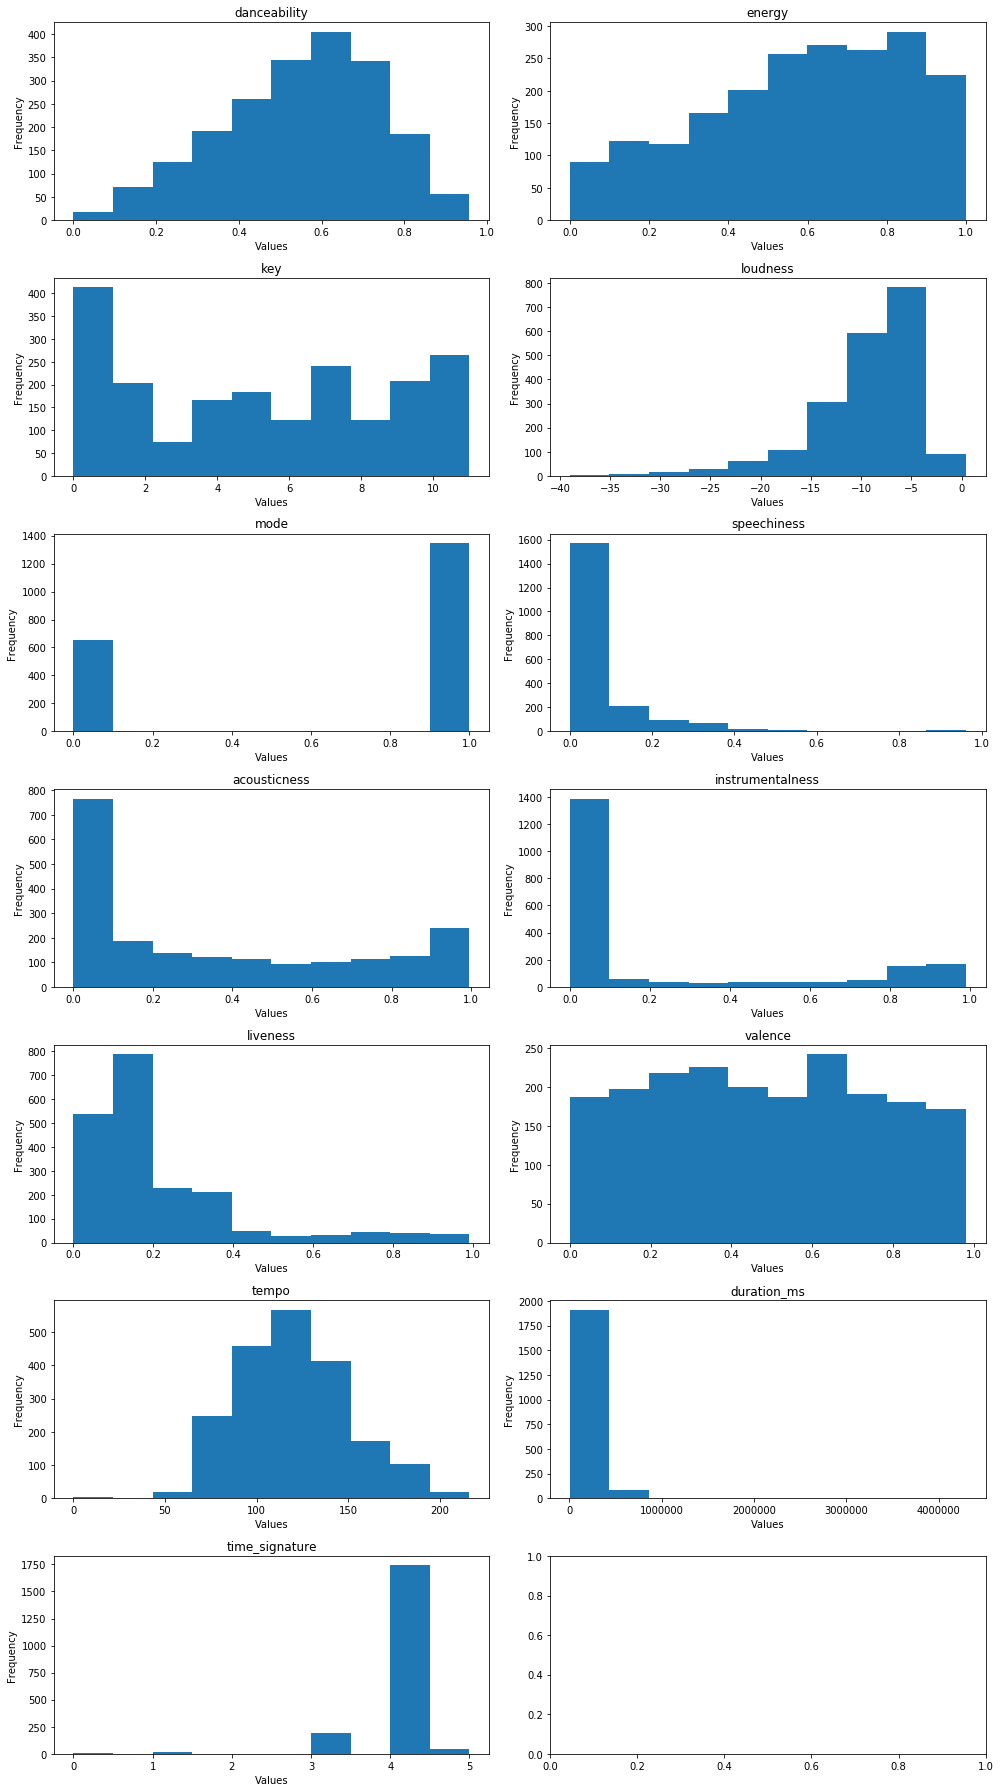

In [36]:
# Plot distributions

N_features = len(feature_names)

fig, ax = plt.subplots(ncols = 2, nrows = N_features//2+1, figsize = (14,25))
for i in range(N_features):
    ax[i//2, i%2].hist(features[i]);
    ax[i//2, i%2].set_title(feature_names[i])
    ax[i//2, i%2].set_ylabel('Frequency')
    ax[i//2, i%2].set_xlabel('Values')
    
plt.tight_layout()
    

We notice that the distributions for danceability and tempo are somewhat normal, whereas the valence distribution is almost uniform. For the other variables, some of which are categorical, and others are continuous with varying distributions.


---- ----- ----- ----- 